In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
Fraud_DataSet = pd.read_csv("Fraud.csv")

In [3]:
print(Fraud_DataSet.head(),"\n")
print(Fraud_DataSet.shape)

#about the dataset 
# step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

# type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

# amount - amount of the transaction in local currency.

# nameOrig - customer who started the transaction

# oldbalanceOrg - initial balance before the transaction

# newbalanceOrig - new balance after the transaction

# nameDest - customer who is the recipient of the transaction

# oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

# newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

# isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

# isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0   

(6362620, 11)


In [4]:
Fraud_DataSet.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
Fraud_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
Fraud_DataSet.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# Identify duplicated rows in the Fraud_DataSet
duplicate_rows = Fraud_DataSet[Fraud_DataSet.duplicated()]
print("Number of duplicated rows:", duplicate_rows.shape[0])

Number of duplicated rows: 0


In [8]:
print(Fraud_DataSet.nunique())

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64


In [9]:
# Display formatted descriptive statistical summary of the DataFrame 'df'
Fraud_DataSet.describe().style.format('{:.2f}')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [10]:
# Filter the DataFrame to see all rows where nameDest starts with M
merchant_destinations = Fraud_DataSet[Fraud_DataSet['nameDest'].str.startswith('M')]

# Display the filtered DataFrame
display(merchant_destinations)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [11]:
# In this dataset, destination accounts starting with 'M' are merchants. Merchants always have initial balance = 0, so we flag them for the model.
Fraud_DataSet['isMerchantDest'] = Fraud_DataSet['nameDest'].str.startswith('M').astype(int)


Bi- varaint analysis

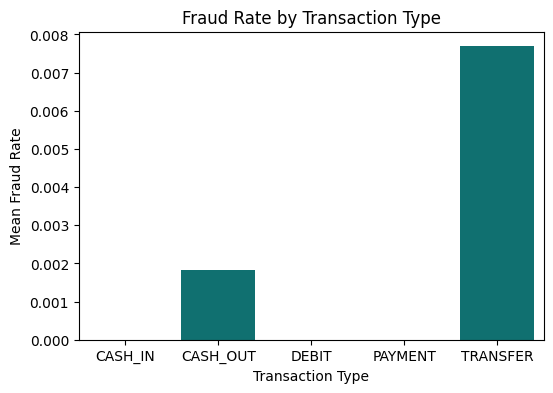

In [12]:
#Bi- varaint analysis
# Group by 'type' to see what type of transaction types more prone to fraud?
fraud_by_type = Fraud_DataSet.groupby('type')['isFraud'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=fraud_by_type, x='type', y='isFraud', color='teal')
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Mean Fraud Rate')
plt.show()

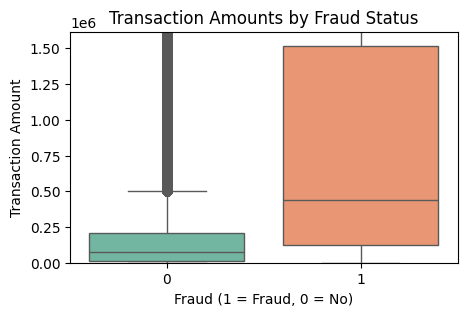

In [13]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=Fraud_DataSet, x='isFraud', y='amount', palette='Set2')
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Fraud (1 = Fraud, 0 = No)')
plt.ylabel('Transaction Amount')
plt.ylim(0, Fraud_DataSet['amount'].quantile(0.99))  
plt.show()


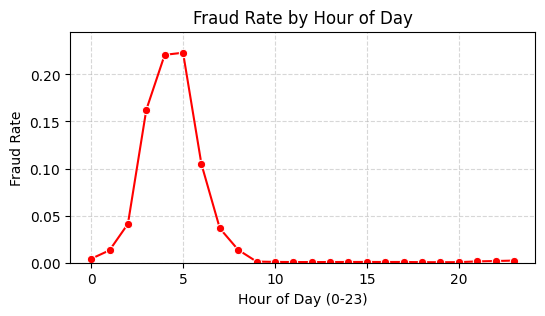

In [14]:
# Temporary 'hour' column for plotting
fraud_by_hour = (
    Fraud_DataSet
    .assign(hour = Fraud_DataSet['step'] % 24)  
    .groupby('hour')['isFraud']
    .mean()
    .reset_index()
)

# Plot fraud rate by hour
plt.figure(figsize=(6, 3))
sns.lineplot(data=fraud_by_hour, x='hour', y='isFraud', marker='o', color='red')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Fraud Rate')
plt.ylim(0, fraud_by_hour['isFraud'].max() * 1.1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

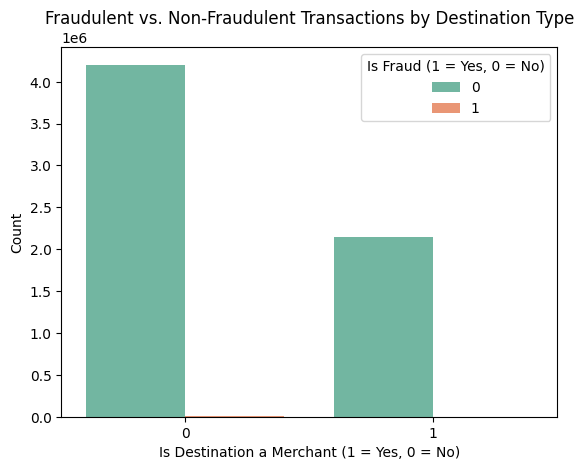

In [15]:
sns.countplot(x='isMerchantDest', hue='isFraud', data=Fraud_DataSet, palette='Set2')

# Set labels and title for better readability
plt.xlabel('Is Destination a Merchant (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.title('Fraudulent vs. Non-Fraudulent Transactions by Destination Type')
plt.legend(title='Is Fraud (1 = Yes, 0 = No)')

plt.show()

In [16]:
# Create new time-based features
# Hour of the day (0–23)
Fraud_DataSet['hour'] = Fraud_DataSet['step'] % 24

# Day number (0 = first day, up to ~30)
Fraud_DataSet['day'] = Fraud_DataSet['step'] // 24

# Flag for nighttime transactions (example: 0–6 AM)
Fraud_DataSet['is_night'] = Fraud_DataSet['hour'].apply(lambda x: 1 if 0 <= x <= 6 else 0)

In [17]:
Fraud_DataSet.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'isMerchantDest', 'hour', 'day', 'is_night'],
      dtype='object')

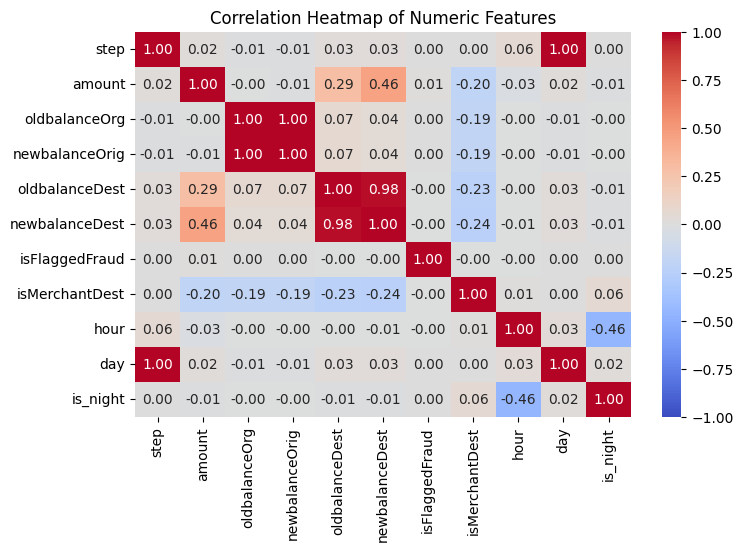

In [18]:
# Select only numeric columns (excluding IDs like nameOrig, nameDest)
numeric_cols = Fraud_DataSet.select_dtypes(include=['int64', 'float64']).drop(columns=['isFraud'])

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_type = encoder.fit_transform(Fraud_DataSet[['type']])

# Get new column names from the encoder
encoded_cols = encoder.get_feature_names_out(['type'])

# Create a DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded_type, columns=encoded_cols, index=Fraud_DataSet.index)

# Drop the original 'type' column and add encoded columns
Fraud_DataSet = pd.concat([Fraud_DataSet.drop('type', axis=1), encoded_df], axis=1)


In [20]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns relevant for VIF
numeric_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

z = Fraud_DataSet[numeric_features]

# Add constant column for intercept (optional but common)
Z = z.assign(constant=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = Z.columns
vif_data['VIF'] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]

print(vif_data)


          feature         VIF
0            step    1.002398
1          amount    3.709320
2   oldbalanceOrg  430.079938
3  newbalanceOrig  431.127244
4  oldbalanceDest   65.076535
5  newbalanceDest   74.981695
6        constant    4.137022


In [21]:
df = Fraud_DataSet.copy()

In [22]:
print(df.columns,"\n")
print(df.shape)

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'isMerchantDest', 'hour', 'day', 'is_night',
       'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'],
      dtype='object') 

(6362620, 19)


In [23]:
# Create new balance change features
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Drop the highly correlated columns
df = df.drop(columns=['newbalanceOrig', 'newbalanceDest', ])

# Now your dataframe has balance_change_orig and balance_change_dest instead
# You can check the updated columns
print(df[['balance_change_orig', 'balance_change_dest']].head())


   balance_change_orig  balance_change_dest
0             -9839.64                  0.0
1             -1864.28                  0.0
2              -181.00                  0.0
3              -181.00             -21182.0
4            -11668.14                  0.0


In [24]:
# Drop the columns 'step', 'nameOrig', and 'nameDest'
df = df.drop(columns=['step', 'nameOrig', 'nameDest'])

# Check the updated columns
print(df.columns)


Index(['amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud',
       'isFlaggedFraud', 'isMerchantDest', 'hour', 'day', 'is_night',
       'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER', 'balance_change_orig', 'balance_change_dest'],
      dtype='object')


In [25]:
df.columns

Index(['amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud',
       'isFlaggedFraud', 'isMerchantDest', 'hour', 'day', 'is_night',
       'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER', 'balance_change_orig', 'balance_change_dest'],
      dtype='object')

In [26]:
df['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features and target
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Train-test split with stratification to keep class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE only on training data to balance minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print('Before oversampling:', y_train.value_counts())
print('After oversampling:', y_train_res.value_counts())

Before oversampling: isFraud
0    5083526
1       6570
Name: count, dtype: int64
After oversampling: isFraud
0    5083526
1    5083526
Name: count, dtype: int64


In [28]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train on oversampled data
rf.fit(X_train_res, y_train_res)

# Predictions on test data
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # probabilities for ROC AUC

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.62      0.92      0.74      1643

    accuracy                           1.00   1272524
   macro avg       0.81      0.96      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
 [[1269936     945]
 [    125    1518]]
ROC AUC Score: 0.9988004707627104
